# <center> Presidential Election - 2016 Dataset EDA </center>
### <center> Presented By:- Kashika Akhouri

## Importing All Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Reading the dataset using Pandas

In [2]:
#Loading the dataset from the URL in a variable called datafr
datafr = pd.read_csv('https://raw.githubusercontent.com/zep-analytics/presidential-polls/main/presidential_polls.csv')

In [3]:
#Displaying the top 5 rows in the dataframe
datafr.head(5)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


## Basic Operations on Dataset

### Finding the shape of the dataset

In [4]:
# Printing the shape of the dataset
datafr.shape

#OBSERVATION : Number of rows = 10236
#              Number of columns = 27

(10236, 27)

### Description of all numeric fields in the dataset

In [5]:
# Describing the numerical data fields in dataset which include count, mean, standard deviation etc.
datafr.describe()

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id
count,10236.0,10233.000000,10236.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000
mean,2016.0,1115.791557,0.221769,41.717579,39.227002,7.713394,23.235294,43.024900,42.048617,4.804207,24.877707,45317.883060,70588.462485
std,0.0,2159.610968,0.535846,7.482747,7.648679,2.948387,7.278979,6.732445,6.707382,2.492364,5.710113,2871.251404,4677.283414
min,2016.0,35.000000,0.000000,11.040000,4.000000,0.000000,9.000000,16.419590,3.233949,-3.372429,13.973230,35362.000000,47244.000000
25%,2016.0,440.000000,0.000444,38.000000,34.877500,6.000000,20.000000,40.151210,37.973375,3.321972,21.407520,44850.750000,68747.000000
50%,2016.0,772.000000,0.008206,43.000000,39.000000,7.250000,26.000000,43.732560,42.034530,4.502154,26.093830,45925.500000,71773.500000
75%,2016.0,1225.000000,0.101939,46.000000,44.000000,9.000000,29.000000,46.507035,45.373783,5.855422,29.672160,47008.250000,73497.750000
max,2016.0,40816.000000,7.591351,88.000000,68.000000,25.000000,31.000000,86.699620,71.864600,19.277800,31.982120,48000.000000,75067.000000


### Printing all column names

In [6]:
# Printing names of all columns to analyze the different sets of data available in the dataset
datafr.columns

Index(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
       'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

### DataType of Each Column

In [7]:
# Printing datatypes of each field
datafr.dtypes

# OBSERVATION
# Three types of data fields are present in the dataset : object  and numeric(int, float)
# We see that column forecastdate, startdate, enddate are also in object datatype.
# We will change their datatype into datatime soon.

cycle                 int64
branch               object
type                 object
matchup              object
forecastdate         object
state                object
startdate            object
enddate              object
pollster             object
grade                object
samplesize          float64
population           object
poll_wt             float64
rawpoll_clinton     float64
rawpoll_trump       float64
rawpoll_johnson     float64
rawpoll_mcmullin    float64
adjpoll_clinton     float64
adjpoll_trump       float64
adjpoll_johnson     float64
adjpoll_mcmullin    float64
multiversions        object
url                  object
poll_id               int64
question_id           int64
createddate          object
timestamp            object
dtype: object

## Checking for NULL values in the Dataset

In [7]:
datafr.isnull().sum()

# OBSERVATION 
# Fields that have null values are
# - Grade
# - rawpoll_johnson
# - rawpoll_mcmullin
# - adjpoll_mcmullin
# - multiversions

cycle                   0
branch                  0
type                    0
matchup                 0
forecastdate            0
state                   0
startdate               0
enddate                 0
pollster                0
grade                1134
samplesize              3
population              0
poll_wt                 0
rawpoll_clinton         0
rawpoll_trump           0
rawpoll_johnson      3756
rawpoll_mcmullin    10185
adjpoll_clinton         0
adjpoll_trump           0
adjpoll_johnson      3756
adjpoll_mcmullin    10185
multiversions       10203
url                     0
poll_id                 0
question_id             0
createddate             0
timestamp               0
dtype: int64

## Finding Number of Unique Values in Each Column

In [9]:
# Number of unique values using nunique() function
datafr.nunique()

# OBSERVATION
# There are a few columns that have just one unique value, example: cycle, branch, matchup, forecastdate etc.
# Since these columns have just one value, they can be dropped and 
# their values can be stored in any variable, for later use if necessary.

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             345
enddate               338
pollster              188
grade                  10
samplesize           1589
population              4
poll_wt              6255
rawpoll_clinton      1179
rawpoll_trump        1254
rawpoll_johnson       540
rawpoll_mcmullin       10
adjpoll_clinton     10197
adjpoll_trump       10188
adjpoll_johnson      5527
adjpoll_mcmullin       33
multiversions           1
url                  1156
poll_id              3412
question_id          3412
createddate           215
timestamp               3
dtype: int64

### Observation
- <b>Polls-Plus:</b> Combines polls with an economic index.
- <b>Polls-Only:</b> A simpler, what-you-see-is-what-you-get version of the model.
- <b>Now-Cast:</b> A projection of what would happen in a hypothetical election held today. 

The dataset contains 3412 unique poll ids, one each for Polls-Plus, Polls-Only and Now-cast Type values

In [10]:
# The different values of type of polls in the dataset along with their total number of appearances
datafr.type.value_counts()

polls-plus    3412
now-cast      3412
polls-only    3412
Name: type, dtype: int64

In [11]:
# The number of unique poll ids is 3412 which is equal to the number of each type of poll in type column
datafr.poll_id.nunique()

3412

### Observation
- Mcmullin, a third-party candidate contested for the election only from Utah
- Johnson, another third-party candidate contested for the election from 55 states (including national elections)

In [12]:
# Finding out states for who=ich McMullin's polls are available
datafr[datafr['adjpoll_mcmullin'].isnull() != True].state.value_counts()

Utah    51
Name: state, dtype: int64

In [13]:
# Finding number of states for which Johnson's polls are available
datafr[datafr['adjpoll_johnson'].isnull() != True].state.nunique()

55

## Selecting Certain Columns from the dataset for further analysis

In [9]:
# As mentioned earlier, we will select from the dataframe, those columns which will be further used in the EDA of the dataset
data = datafr[['type', 'state', 'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population', 
               'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson','rawpoll_mcmullin', 'adjpoll_clinton', 
               'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin']]

In [10]:
# Printing the first 5 rows of the shortened dataset
data.head()

,type,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,polls-plus,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,6.18,NaN,42.64140,40.86509,5.675099,NaN
1,polls-plus,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,3.00,NaN,43.29659,44.72984,3.401513,NaN
2,polls-plus,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1024.0,lv,3.876856,48.00,42.00,6.00,NaN,46.29779,40.72604,6.401513,NaN
3,polls-plus,Florida,10/20/2016,10/24/2016,SurveyUSA,A,1251.0,lv,3.403096,48.00,45.00,2.00,NaN,46.35931,45.30585,1.777730,NaN
4,polls-plus,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,2120.0,rv,3.394646,46.00,40.00,6.00,NaN,45.32744,42.20888,3.618320,NaN


### Converting Dates to Pandas datatime datatype

In [11]:
# As shown below, the startdate and enddate are present with the datatype object in the dataset
# We will conver these to pandas datetime datatype for more comprehensive calculation in the future
data['enddate'] = pd.to_datetime(data.enddate)
data['startdate'] = pd.to_datetime(data.enddate)

<ipython-input-11-6871348306a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-11-6871348306a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# EDA

### Analysing Poll Weight w.r.t time, grade and SampleSize
In the following chart, we will analyse the variation in the value of poll weights through time for every grade

### Poll Weight: 
Estimated Value of Polls and is based on the Pollester Grade and Samplesize.
<br>

#### Calculating the different Types of Grades allotted

In [17]:
# Each pollster assigns a grade and this grade ranges from A + to D and consists of 10 grades in total. 
# We will analyse the variation of poll weights falling in each category through the enddate.
data.grade.unique()

array(['B', 'A+', 'A', 'B+', 'A-', 'B-', nan, 'C+', 'C-', 'C', 'D'],
      dtype=object)

#### Calculating Frequency of Each Grade

In [18]:
# Counting number of rows (frequency) of each grade
data.grade.value_counts()

# OBSERVATION
# The maximum frequency belongs to grade A- which means this grade has been assigned to the prediction the most often

A-    2796
B     2622
C-    1146
C+     846
B+     552
A      432
B-     327
A+     216
C      138
D       27
Name: grade, dtype: int64

### Plotting a Relational Plot Between End Date and Poll Weight

<Figure size 432x360 with 0 Axes>

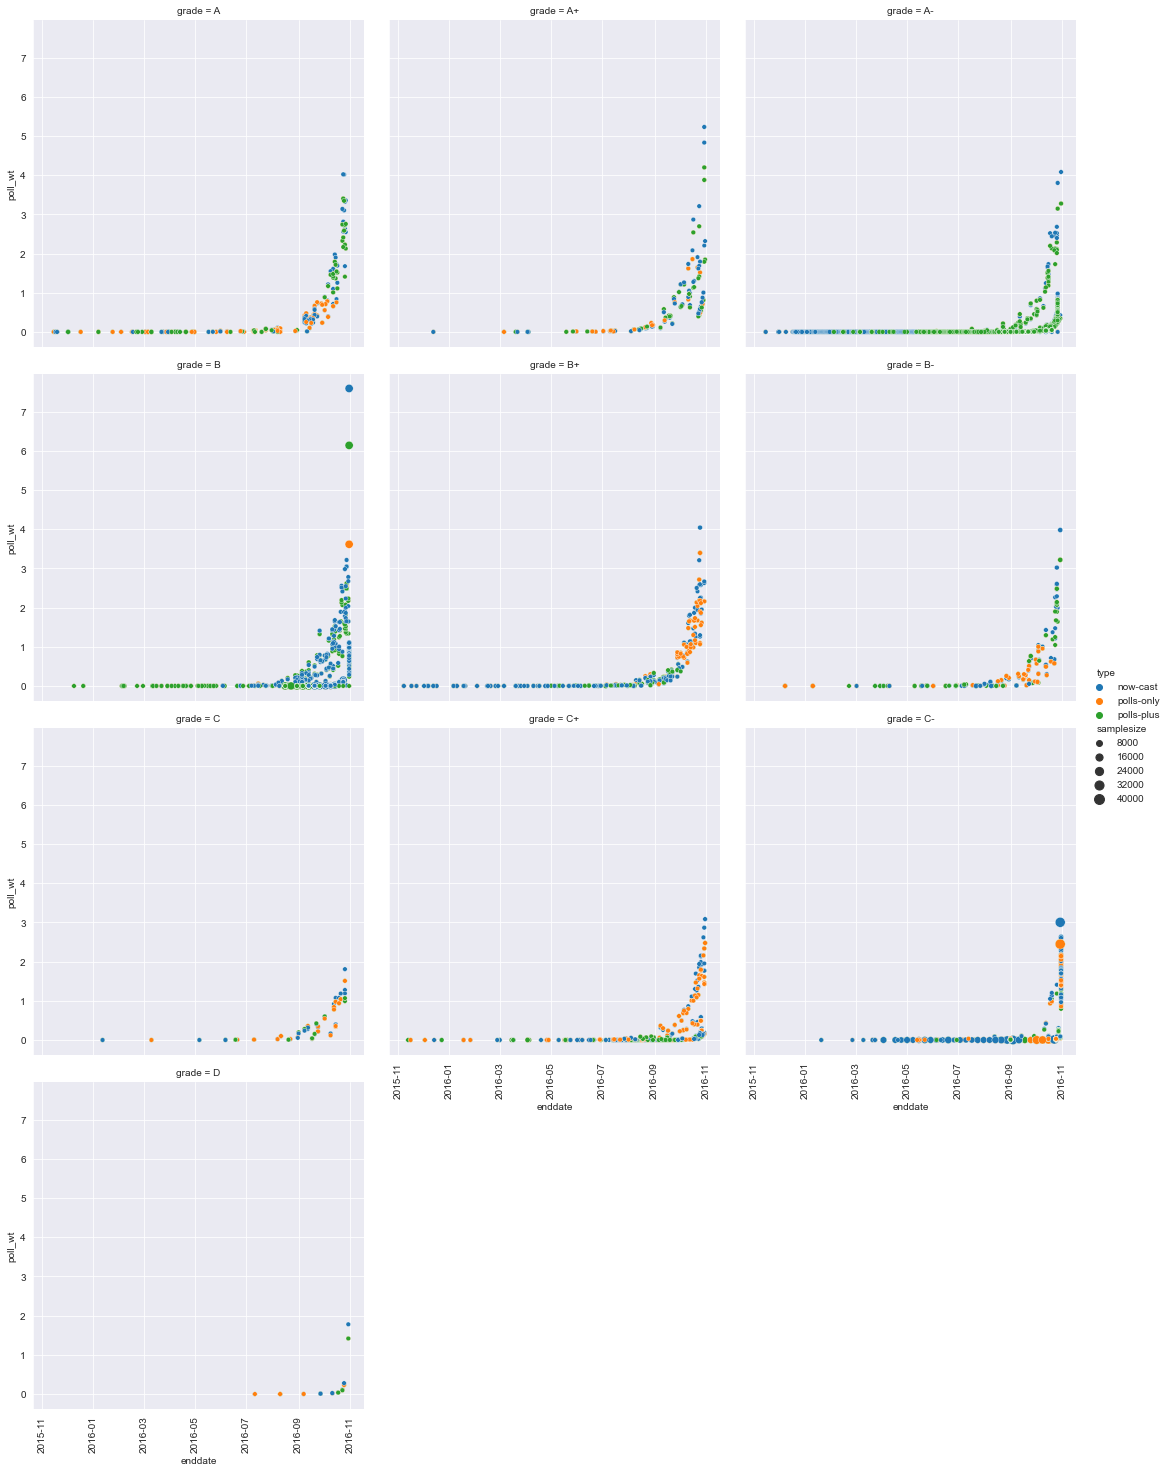

In [17]:
# Plotting a Relational Plot using seaborn depicting the variation of poll weight across time
plt.figure(figsize=(6,5))

# Seaborn Relational Plot
# X-axis: enddate column, Y-axis: poll-wt
# In hue, we have applied grade column and separated each graph using the col option
# In size, we have used the samplesize column 
g = sns.relplot(x='enddate', y='poll_wt', 
            hue='type', size='samplesize',
            col = 'grade',
            col_wrap = 3,
            sizes=(20, 100),
            data = data.sort_values(by = 'grade'))

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)

### Observations:
- Many of the older surveys have a poll_wt of pretty much zero, meaning they are not being used at all in estimating current predictions.
- The grade with maximum frequency is grade A- with grade B closely behind
- New cast poll weights are abundant near the election date i.e. towards the end of the graph
- Graph B has outliers that have poll weight values very high as compared to other poll weights values in the graph

<b> NOTE: </b> This graph/plot has not taken into account the NaN grade values. They have been omitted directly by the seaborn library itself

## Analysing The Rawpolls and Adjpolls for two major candidates

### Hillary Clinton

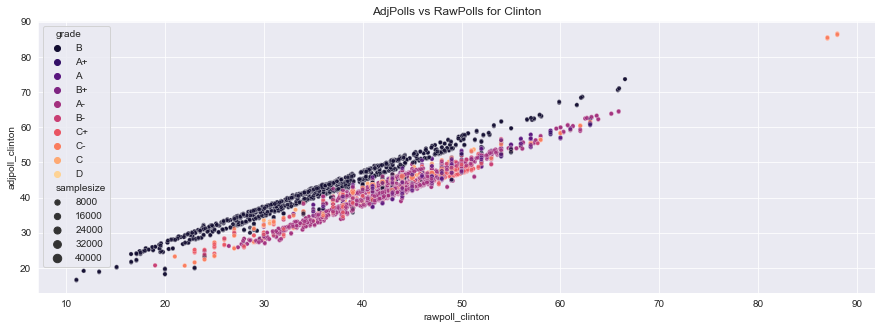

In [19]:
# Here, a scatterplot has been used to depict the rawpolls and adjpolls on each axis. 
# Hue: grade and Size: Samplesize
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.title('AdjPolls vs RawPolls for Clinton')

g = sns.scatterplot(x='rawpoll_clinton', y='adjpoll_clinton', 
            hue='grade', size='samplesize', palette='magma',
            s= 100, alpha = 0.7,
            data = data)

# OBSERVATION
# Most of the rawpoll and adjpolls value are greater than 10 and less than 70. 
# This is supported by the mean value of 41.717 value we calculated for Rawpoll for Clinton
# In rawpolls, we have outliers that have values way beyond 80.

### Donald Trump

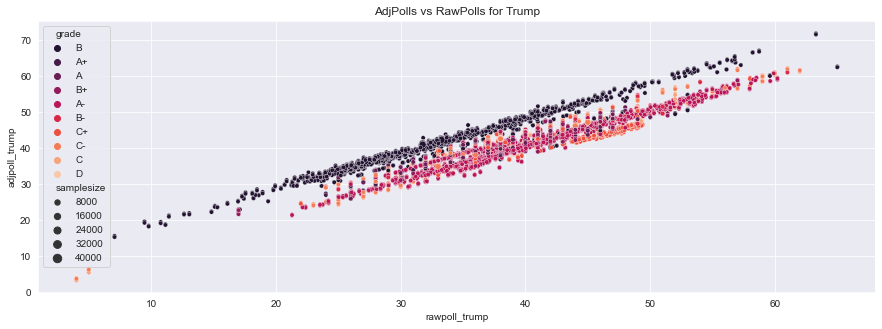

In [20]:
# Here, a scatterplot has been used to depict the rawpolls and adjpolls on each axis. 
# Hue: grade and Size: Samplesize

plt.figure(figsize=(15,5))
plt.title('AdjPolls vs RawPolls for Trump')

g = sns.scatterplot(x='rawpoll_trump', y='adjpoll_trump', 
            hue='grade', size='samplesize', palette='rocket',
            s= 100, alpha = 1,
            data = data)

# OBSERVATION
# Most of the rawpoll and adjpolls value are greater than 10 and less than 70. 
# This is supported by the mean value of 39.2 value we calculated for Rawpoll for Trump

## Calculating the ratios of Adjpoll and Rawpolls for Two major candidates

In [22]:
# Creating new columns to store the ratio of adjpoll and rawpoll for each row for both Clinton and Trump
data['ratio_clinton'] = data['adjpoll_clinton']/data['rawpoll_clinton']
data['ratio_trump'] = data['adjpoll_trump']/data['rawpoll_trump']

<ipython-input-22-88f57c11d08f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-22-88f57c11d08f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'Ratio')

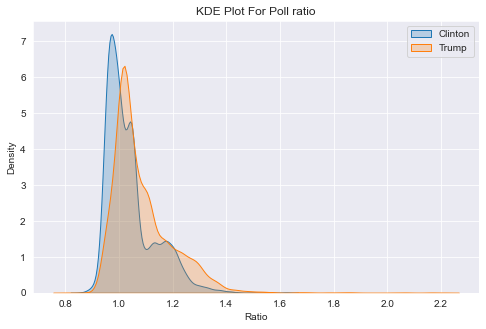

In [23]:
# Plotting a KDE Plot to analyse the two ratios and their densities

sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
plt.title('KDE Plot For Poll ratio')

sns.kdeplot(data.ratio_clinton, shade=True, label="Clinton")
sns.kdeplot(data.ratio_trump, shade=True, label="Trump")
plt.legend()
plt.xlabel('Ratio')

# OBSERVATION
# The density for Clinton is higher than that of Trump
# The peak density has been reached at a lower ratio for Clinton

## Different Pollsters and Their Effects on the Polls
There are different types of Pollsters in the dataset and each have assigned grades to the polls. In this section, we will put emphasis on the Pollster column in the dataset.

In [25]:
# The number of unique pollsters in the dataset
data.pollster.nunique()

188

In [25]:
# Finding the Top 10 most frequent pollsters in the dataset
top10 = data.groupby('pollster')['type'].count().nlargest(10).sort_values()

<AxesSubplot:title={'center':'10 Most Frequent Pollsters'}, ylabel='pollster'>

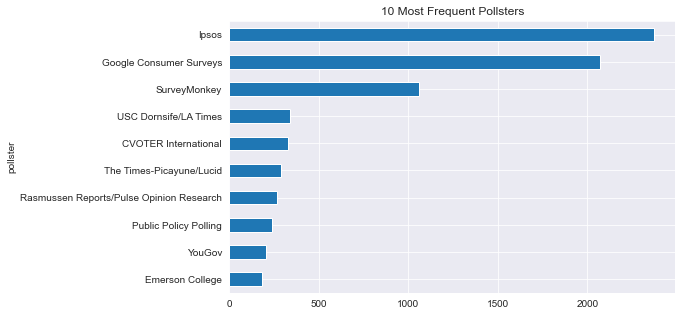

In [26]:
# Plotting the the top 10 most frequent Pollsters in the bar chart
plt.figure(figsize=(8,5))
plt.title('10 Most Frequent Pollsters')
top10.plot(kind = 'barh')

## State vs National Election
In the state section in the dataset, we have U.S. and several other states. So here, we will analyse the state vs national election 

In [66]:
# We divide the dataset into two variables namely national and state that store records with state U.S 
# and records that are not state US respectively
national = data[data['state'] == 'U.S.']
state = data[data['state'] != 'U.S.']

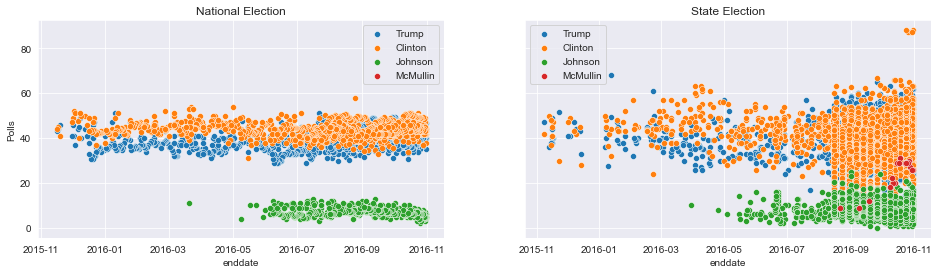

In [121]:
# Using these two datasets - national and state, we will plot two scatter subplots that plot 
# rawpolls values for each of the candidates and utilizes only polls-only type.

fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey= True)

axes[0].set_title('National Election')
axes[0].set_ylabel('Polls')

sns.scatterplot(ax = axes[0], x='enddate', y = 'rawpoll_trump',
            data = national[national['type']=='polls-only'], label = 'Trump')

sns.scatterplot(ax = axes[0], x='enddate', y = 'rawpoll_clinton',
            data = national[national['type']=='polls-only'], label = 'Clinton')

sns.scatterplot(ax = axes[0], x='enddate', y = 'rawpoll_johnson',
            data = national[national['type']=='polls-only'], label = 'Johnson')

sns.scatterplot(ax = axes[0], x='enddate', y = 'rawpoll_mcmullin',
            data = national[national['type']=='polls-only'], label = 'McMullin')

axes[1].set_title('State Election')

sns.scatterplot(ax = axes[1], x='enddate', y = 'rawpoll_trump',
            data = state[state['type']=='polls-only'], label = 'Trump')

sns.scatterplot(ax = axes[1], x='enddate', y = 'rawpoll_clinton',
            data = state[state['type']=='polls-only'], label = 'Clinton')

sns.scatterplot(ax = axes[1], x='enddate', y = 'rawpoll_johnson',
            data = state[state['type']=='polls-only'], label = 'Johnson')

sns.scatterplot(ax = axes[1], x='enddate', y = 'rawpoll_mcmullin',
            data = state[state['type']=='polls-only'], label = 'McMullin')

plt.legend()

# OBSERVATION
# McMullin has no votes in national election and has votes in the state election. 
# (Recall that we initially formulated that McMullin has poll values only in the state Utah)
# The density of poll values has increased across time and has maximum numbers towards the election data
# Johnson's polls have lower values than Clinton's and trump's in both national and state elections
# Clinton poll values are constantly at a higher level than Trump's poll values especially in the National Election.